In [1]:
%matplotlib inline
import os
import dlib
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.font_manager import FontManager, FontProperties 

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

# 1. 臉部偵測

In [2]:
def img_open(path):
    img = Image.open(path)
    return img

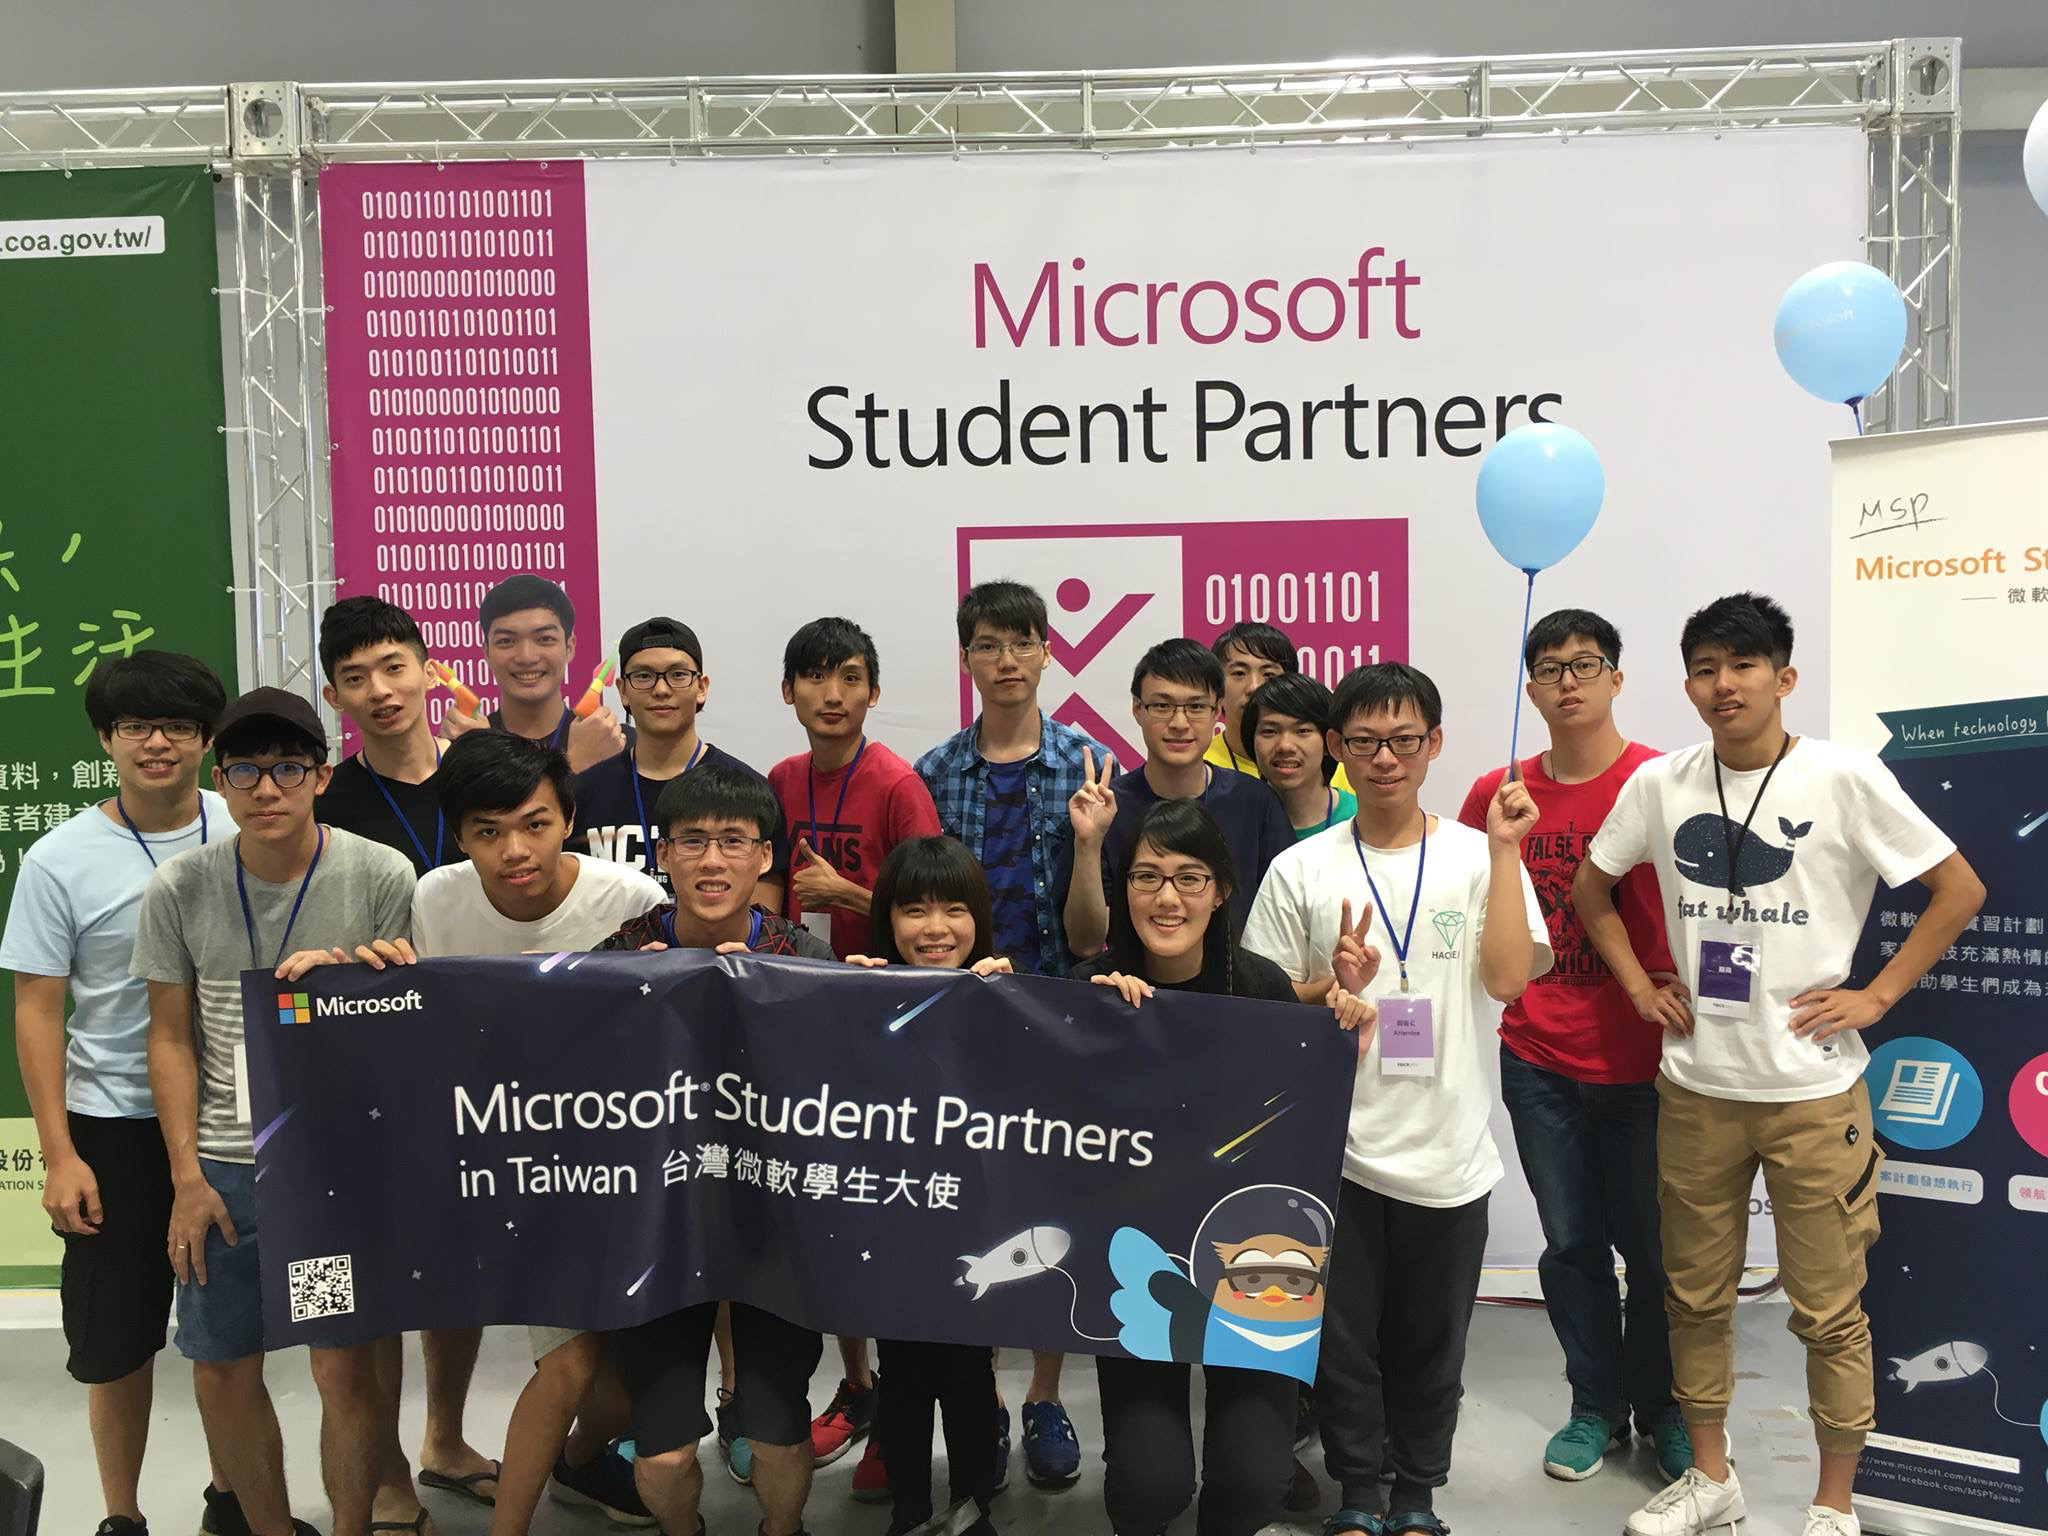

In [3]:
msp12 = img_open('datasets/test_data/msp12.jpg')
msp12

In [4]:
def face_dectect(path):    
    fig = plt.gcf()
    fig.set_size_inches(20, 30)
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image, number_of_times_to_upsample = 0, model = "cnn")
    print("{} face in the photograph.".format(len(face_locations)))
    face_list = []
    for face_location, i in zip (face_locations, range(len(face_locations))):
        top, right, bottom, left = face_location
        print("top: {}, left: {}, bottom: {}, right: {}".format(top, left, bottom, right))
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(np.asarray(pil_image))
        face_list.append(np.asarray(pil_image))
    np.save('feature/face_list', face_list)    
    plt.show()

17 face in the photograph.
top: 636, left: 331, bottom: 730, right: 426
top: 876, left: 878, bottom: 970, right: 973
top: 612, left: 484, bottom: 691, right: 563
top: 644, left: 620, bottom: 723, right: 699
top: 700, left: 1244, bottom: 779, right: 1323
top: 626, left: 1675, bottom: 721, right: 1770
top: 684, left: 110, bottom: 778, right: 205
top: 652, left: 788, bottom: 731, right: 867
top: 612, left: 964, bottom: 691, right: 1043
top: 726, left: 213, bottom: 839, right: 327
top: 799, left: 465, bottom: 894, right: 560
top: 818, left: 657, bottom: 913, right: 752
top: 684, left: 1132, bottom: 763, right: 1211
top: 847, left: 1118, bottom: 942, right: 1213
top: 693, left: 1339, bottom: 788, right: 1434
top: 636, left: 1532, bottom: 715, right: 1611
top: 644, left: 1212, bottom: 723, right: 1291


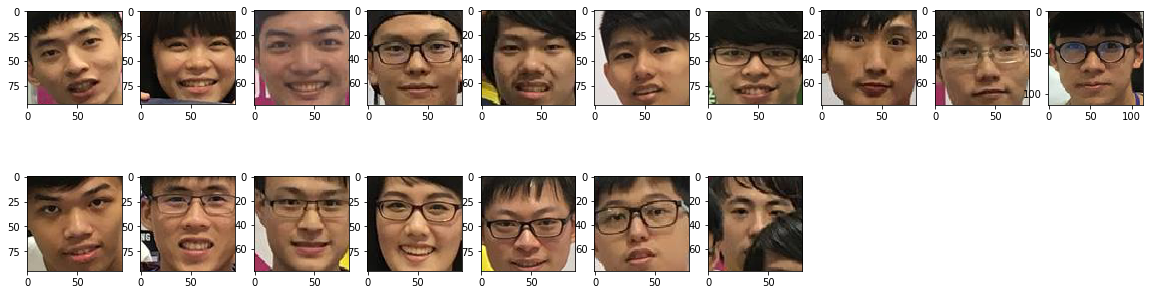

In [5]:
face_dectect('datasets/test_data/msp12.jpg')

# 2. 臉部特徵

In [6]:
def face_rotate(path):
    img = Image.open(path).rotate(270)
    return img

In [7]:
def face_encode(path):
    try:
        face_encoding = face_recognition.face_encodings(np.array(Image.open(path)))[0]
        return face_encoding
    except:
        face_encoding = face_recognition.face_encodings(np.array(face_rotate(path)))[0]
        return face_encoding

In [8]:
def face_compare(face_encoding1, face_encoding2):
    result = face_recognition.compare_faces(face_encoding1, face_encoding2, tolerance = 0.4)
    return result

In [9]:
def face_feature(path):
    img = np.array((Image.open(path)))
    face_landmarks_list = face_recognition.face_landmarks(img)
    if len(face_landmarks_list) == 0:
        img = np.array(face_rotate(path))
        face_landmarks_list = face_recognition.face_landmarks(img)
    for face_landmarks in face_landmarks_list:
        facial_features = [
            'chin',
            'left_eyebrow',
            'right_eyebrow',
            'nose_bridge',
            'nose_tip',
            'left_eye',
            'right_eye',
            'top_lip',
            'bottom_lip'
        ]
        for facial_feature in facial_features:
            print("{}: {}".format(facial_feature, face_landmarks[facial_feature]))
        pil_image = Image.fromarray(img)
        d = ImageDraw.Draw(pil_image)
        for facial_feature in facial_features:
            d.line(face_landmarks[facial_feature], width = 10, fill=(255, 0, 0, 128))
        return pil_image

In [2]:
# danny = img_open('datasets/test_data/danny.jpg')
# danny

In [3]:
# danny = face_feature('datasets/test_data/danny.jpg')
# danny

# 3. 臉部辨識

In [12]:
def create_dict():
    pic_list = os.listdir("datasets/msp12")
    try:
        pic_list.remove('.DS_Store')
    except:
        pass
    pic_dict = {}
    for i in range(len(pic_list)):
        temp = pic_list[i].split(".")[0]
        pic_dict[i] = temp
    return pic_dict, pic_list    

In [13]:
pic_dict, pic_list = create_dict()

In [14]:
def get_feature(pict_list):
    img_list = []
    for i in pic_list:
        file_name = "datasets/msp12" + "/" + i
        img_list.append(face_encode(file_name))
    np.save('feature/img_list', img_list)    
    return img_list    

In [15]:
try:
    img_list = np.load('feature/img_list.npy')
except:
    img_list = get_feature(pic_list)
img_list.shape

(20, 128)

In [16]:
def get_chinese_font():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc')

In [17]:
def face_recognize(path):    
    fig = plt.gcf()
    fig.set_size_inches(20, 30)
    image = face_recognition.load_image_file(path)
    face_locations = face_recognition.face_locations(image, number_of_times_to_upsample = 0, model="cnn")
    for face_location, i in zip (face_locations, range(len(face_locations))):
        top, right, bottom, left = face_location
#         print("top: {}, left: {}, bottom: {}, right: {}".format(top, left, bottom, right))
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(np.asarray(pil_image))
        title = '無法辨識'
        ax.set_title(title, fontsize = 20, fontproperties = get_chinese_font())
        try:
            face_encoding = face_recognition.face_encodings(np.array(pil_image))[0]
        except:
            continue
        result = face_compare(img_list, face_encoding)
        for j in range(len(img_list)):
            if result[j] == True:
                title = str(j) + " " + pic_dict[j]
                ax.set_title(title, fontsize = 20, fontproperties = get_chinese_font())                
    plt.show()

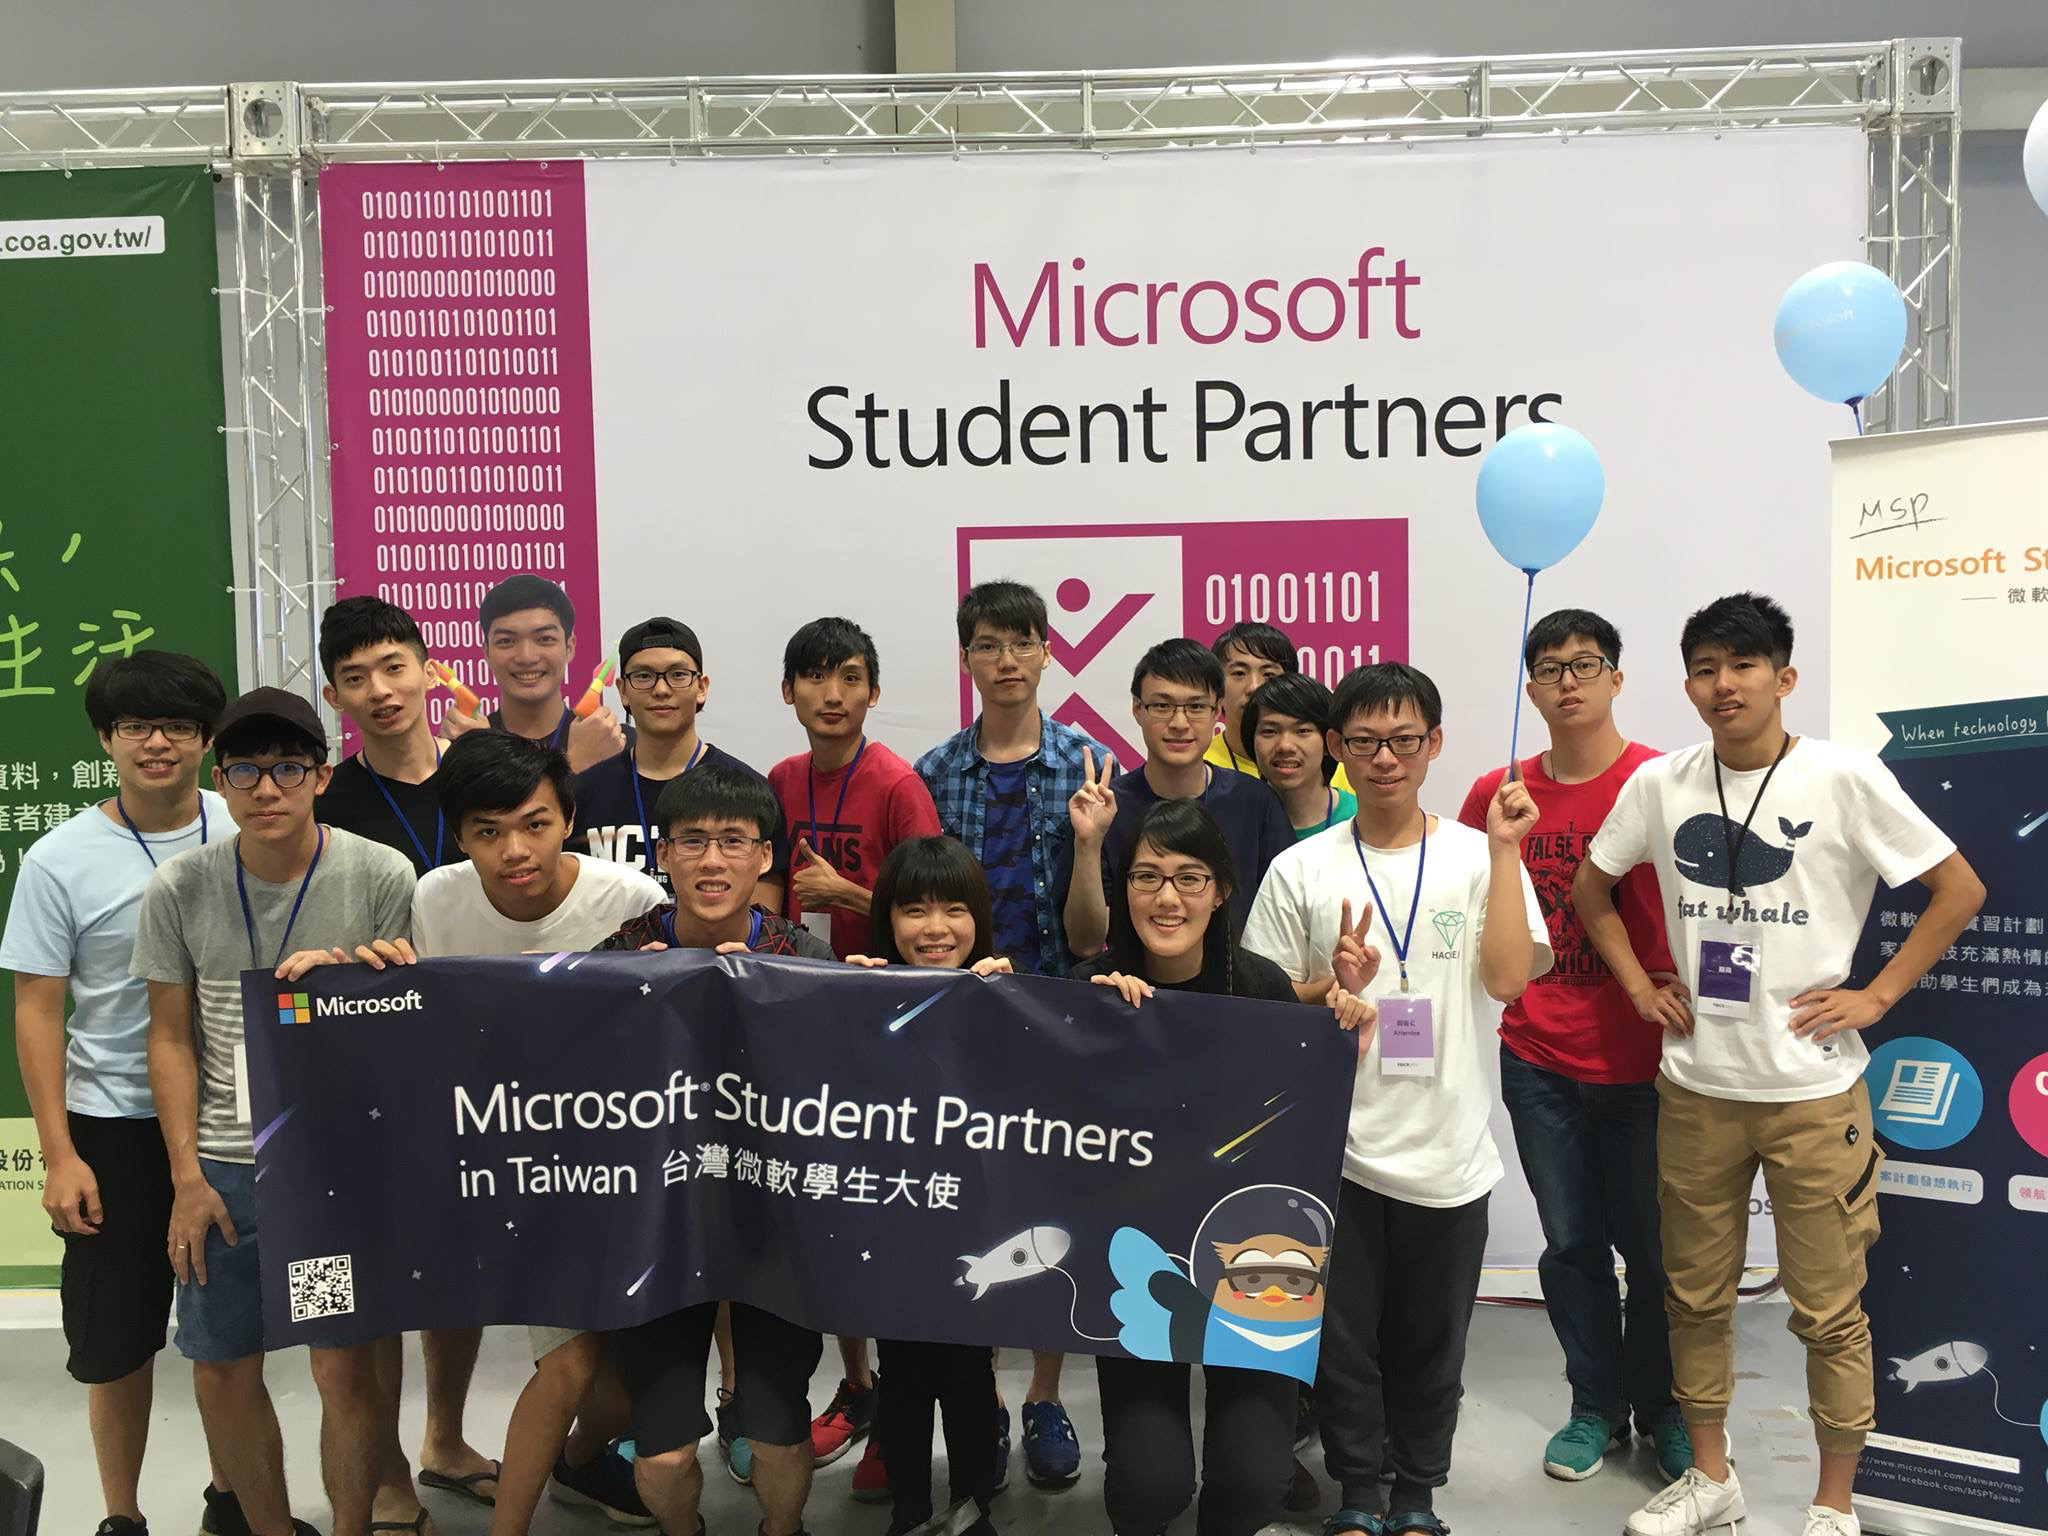

In [18]:
msp12

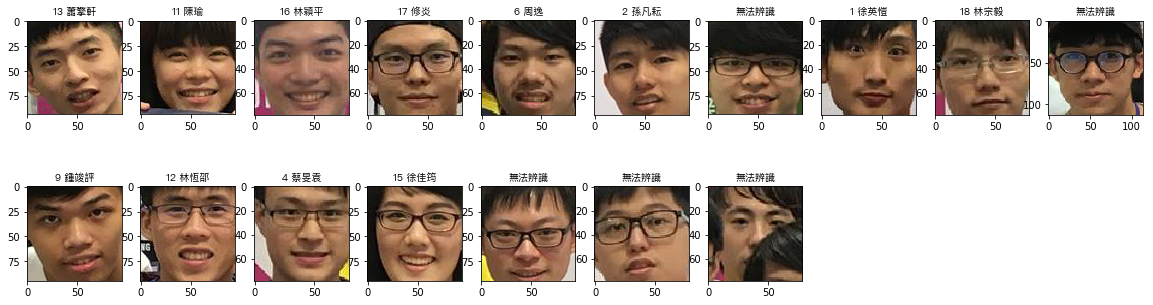

In [19]:
face_recognize("datasets/test_data/msp12.JPG")